## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing

## Data Preparation

In [ ]:
housing_data = fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(data=housing_data.data, columns = housing_data.feature_names)
housing_df['target'] = housing_data.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
housing_df.shape

(20640, 9)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Data Visualization

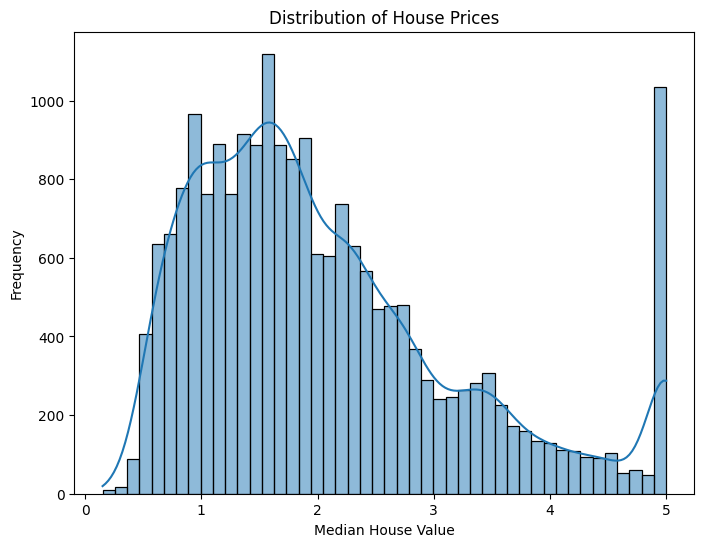

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['target'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

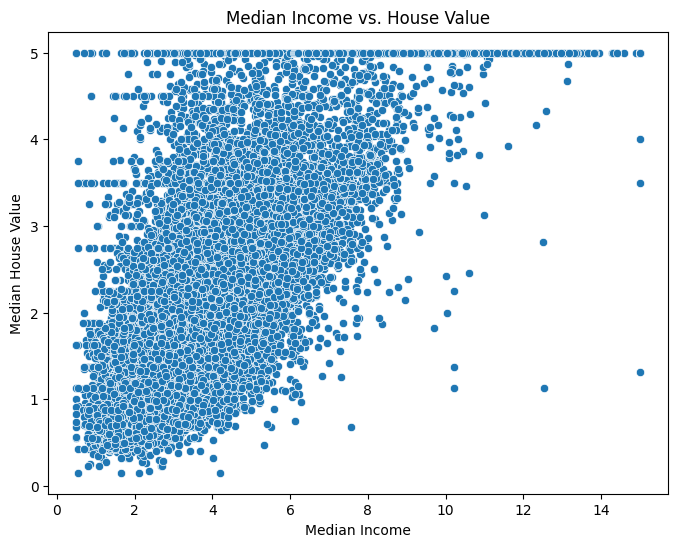

In [ ]:
# Relationship between Median Income and House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='target', data=housing_df)
plt.title('Median Income vs. House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

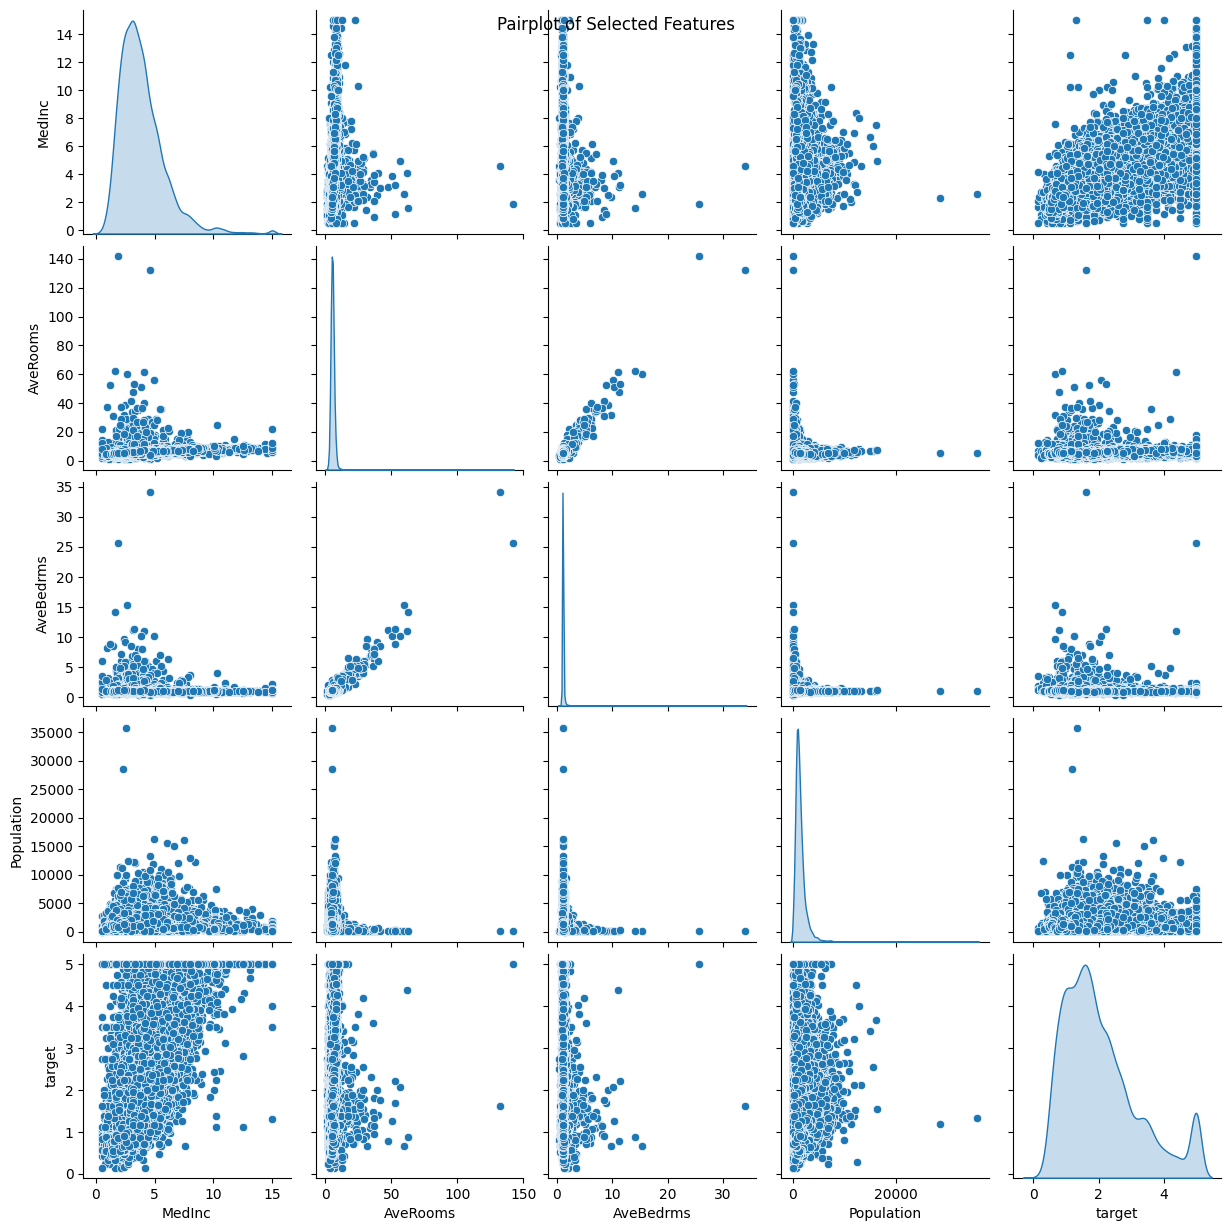

In [ ]:
# Pairplot of selected features
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'target']
sns.pairplot(housing_df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Insights: Provides a comprehensive view of the relationships between selected pairs of features, including the distributions of each feature. Helps visualize multicollinearity, identify outliers and observe trends across features.

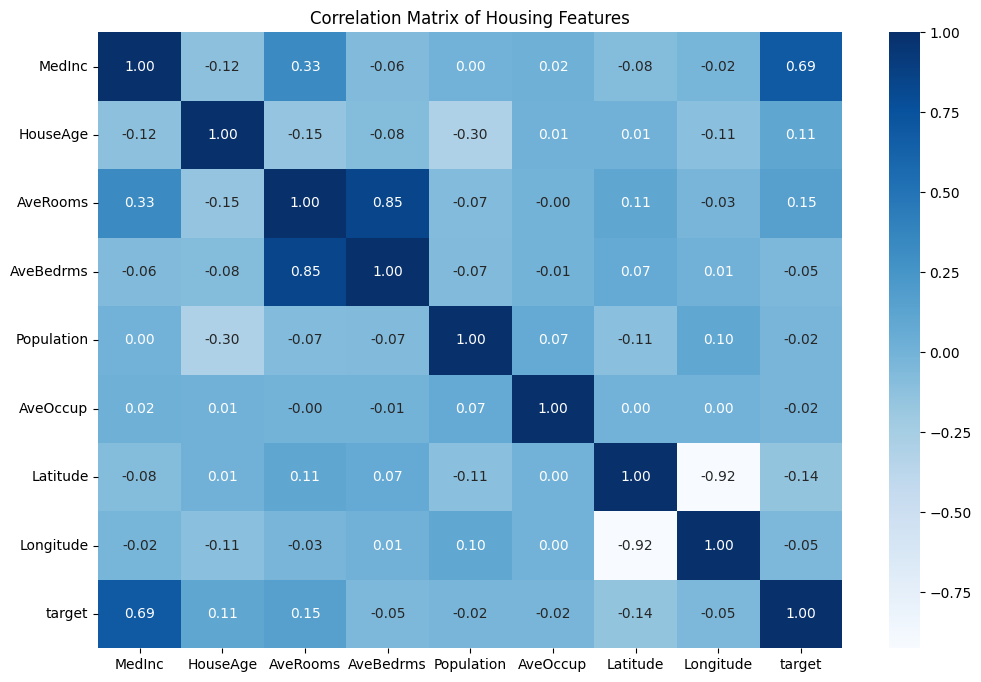

In [ ]:
# Correlation Matrix Heatmap
correlation_matrix = housing_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Insights drawn from visualizations :
* Distribution of House Prices
    - The distribution of median house values is right-skewed, indicating a higher frequency of lower to mid-range house values.
* Median Income vs. House Value
    - A positive correlation is evident—higher median incomes are generally associated with higher median house values.
*Correlation Matrix of Housing Features
    - Median Income (MedInc) has the strongest positive correlation (0.69) with target value.
    - so MedInc is likely the most important feature in predicting house prices.
    - Average Rooms (AveRooms) has a moderate positive correlation (0.15) with house prices.

## Splitting data into train and test sets

In [ ]:
X = housing_df.drop('target', axis=1)
y = housing_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Preparation(Linear Regression)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction (Linear Regression)

In [ ]:
y_pred = model.predict(X_test)

## Model Evaluation (Linear Regression)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R-squared (R2): 0.5757877060324508


* The model has a moderate level of predictive accuracy,
with an R-squared of 0.58.
* The RMSE suggests an average prediction error of around $75,000.
**There is room for improvement*



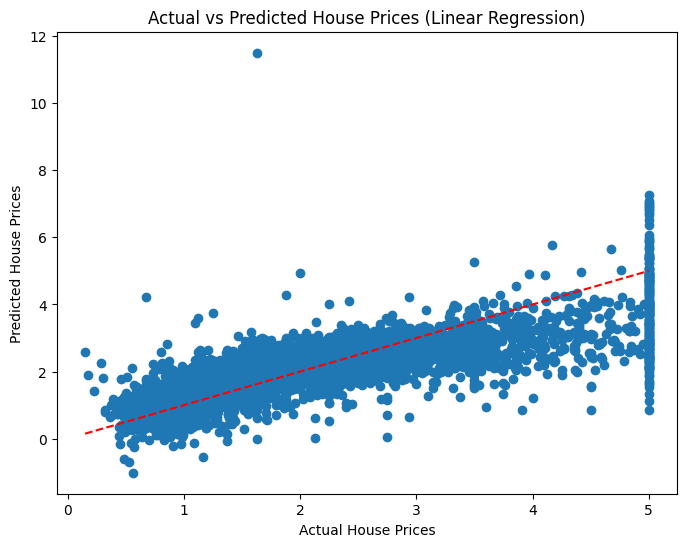

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()

# Performing the prediction using Lasso Regression

Lasso regression can improve your model by automatically removing unnecessary features, reducing overfitting, and handling correlated variables better. It makes the model simpler and potentially more accurate by focusing only on the most important predictors.

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = housing_df.drop('target', axis=1)
y = housing_df['target']
X_scaled = scaler.fit_transform(X)

## Splitting the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Preparation(Ridge Regression)

Ridge Regression generally helps to prevent overfitting, especially when there's multicollinearity (high correlation between features) in the data. While the difference is minimal in this case, Ridge Regression is generally more preferable when you have a large number of features or suspect multicollinearity. Because of it's slight edge in metrics, in this specific case, Ridge is slightly more preferable.

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

## Model Prediction

In [ ]:
y_pred = model.predict(X_test)

## Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.5558875470324999
Root Mean Squared Error (RMSE): 0.745578665891467
R-squared (R2): 0.5757907979394903


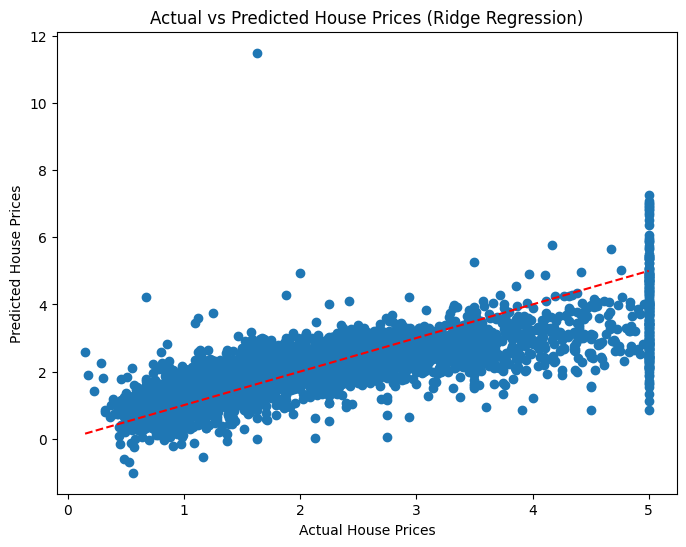

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices (Ridge Regression)")
plt.show()


### Conclusions:

Both models show very similar performance on this dataset based on the evaluation metrics you provided. Ridge regression has a very slightly lower MSE and RMSE and a very slightly higher R-squared, which suggests a marginal improvement over linear regression in this specific case.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Loading the dataset
housing_data = fetch_california_housing()
housing_df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
housing_df['target'] = housing_data.target

# Feature scaling
scaler = StandardScaler()
X = housing_df.drop('target', axis=1)
y = housing_df['target']
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the Ridge model
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

def predict_house_price():
  MedInc = float(input("Enter Median Income: "))
  HouseAge = float(input("Enter House Age: "))
  AveRooms = float(input("Enter Average Number of Rooms: "))
  AveBedrms = float(input("Enter Average Number of Bedrooms: "))
  Population = float(input("Enter Population: "))
  AveOccup = float(input("Enter Average Occupancy: "))
  Latitude = float(input("Enter Latitude: "))
  Longitude = float(input("Enter Longitude: "))

  user_input = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
  user_input_scaled = scaler.transform(user_input)
  predicted_price = model.predict(user_input_scaled)
  print("Predicted House Price:", predicted_price[0])

# Example usage
predict_house_price()

Enter Median Income: 8.3014
Enter House Age: 21.0
Enter Average Number of Rooms: 6.238137
Enter Average Number of Bedrooms: 0.971880
Enter Population: 2401.0
Enter Average Occupancy: 2.109842
Enter Latitude: 37.86
Enter Longitude: -122.22
Predicted House Price: 3.9994942855088036
